In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import nltk
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

In [2]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [27]:
# nltk.download('stopwords')

KeyboardInterrupt: 

In [130]:
GRAPH = '../result/Graphs'
TABLE = '../result/Tables'
DATA = '../data'
VERSION = 4  #1: Merged All 2:Cleaned
os.listdir(DATA)

['Dataset_v3.csv',
 'Dataset_v2.csv',
 '.~lock.Information_Technology.csv#',
 'Jobs (2016-2018).xlsx',
 'ONET_Occupations.csv',
 'vector.npy',
 'Information_Technology.csv',
 'Dataset_v1.csv',
 'Jobs (2019-2021) - Bdjobs.xlsx',
 'skills.csv',
 'Dataset_v5.csv',
 'Dataset_v4.csv',
 'ISCO.csv',
 'Skill_Rank.csv']

<h1>Load Pre processed Data</h1>

In [16]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v'+str(VERSION) + '.csv'))
# ONET = pd.read_csv(os.path.join(DATA,'ONET_Occupations.csv'))
ONET = pd.read_csv(os.path.join(DATA,'Information_Technology.csv'))

In [90]:
def temp_fn(x):
    if 'Software Engineer'.lower() in str(x['JobTitle']).lower(): return 'Software Developers'
    elif 'Software developer'.lower() in str(x['JobTitle']).lower(): return 'Software Developers'
    elif 'Web Developer'.lower() in str(x['JobTitle']).lower(): return 'Web Developers'
    elif 'Executive'.lower() in str(x['JobTitle']).lower() and ('IT' in str(x['JobTitle']) or x['ONET Title'] == 'Computer Occupations, All Other') : return 'Information Technology Project Managers'
    elif 'Assistant'.lower() in str(x['JobTitle']).lower() and ('IT' in str(x['JobTitle']) or x['ONET Title'] == 'Computer Occupations, All Other') : return 'Computer Programmers'
    elif 'Officer'.lower() in str(x['JobTitle']).lower() and 'IT' in str(x['JobTitle']) : return 'Information Technology Project Managers'
    elif 'Manager'.lower() in str(x['JobTitle']).lower() and x['ONET Title'] == 'Computer Occupations, All Other' : return 'Project Management Specialists'
    elif ('Full'.lower() in str(x['JobTitle']).lower() and 'Stack'.lower() in str(x['JobTitle']).lower()) and x['ONET Title'] == 'Computer Occupations, All Other' : return 'Web Developers'
    elif ('Front'.lower() in str(x['JobTitle']).lower() and 'End'.lower() in str(x['JobTitle']).lower()) and x['ONET Title'] == 'Computer Occupations, All Other' : return 'Web and Digital Interface Designers'
    elif 'Head'.lower() in str(x['JobTitle']).lower() and x['ONET Title'] == 'Computer Occupations, All Other' : return 'Business Intelligence Analysts'
    elif 'IT' in str(x['JobTitle']) and x['ONET Title'] == 'Computer Occupations, All Other' : return 'Information Technology Project Managers'
    else : return x['ONET Title']
df['ONET Title'] = df.apply(temp_fn,axis=1)

In [98]:
df.to_csv(os.path.join(DATA,'Dataset_v5.csv'),index=False)

In [96]:
# df['JobTitle'].value_counts()
df[df['ONET Title'] == 'Computer Occupations, All Other']['JobTitle'].sample(20)

5821                               Councilor (Female)
7722                                     Teacher, SEO
4582       Laravel 5.7, Laravel Nova, VueJS Developer
19811                          Lecturer, Dept. of CSE
11510                 সহকারী জুনিয়র ইঞ্জিনিয়ার (আইটি)
21628    অ্যাসোসিয়েট (ই-মেইল ও ওয়েব সার্ভিস ডেলিভারী)
27977                             Officer, E-Commerce
19137                      Guest Trainer, ওয়েব ডিজাইন
8641           Training cum Job Opportunity - Android
6766                          Officer, M-Technologies
8613                       সফটওয়্যার ডেভেলপার (ওরাকল)
5265       প্রদর্শক (খন্ডকালীন) - কম্পিউটার/ আই.সি.টি
21639               অ্যাসোসিয়েট (পরীক্ষা ব্যবস্থাপনা)
12723                                  Fiber Line Man
21636                অ্যাসোসিয়েট (সেমিনার ও প্রচারণা)
2503         বৈজ্ঞানিক কর্মকর্তা (সহকারী প্রোগ্রামার)
834            প্রোগ্রামার - কম্পিউটার বিভাগ (বিম্‌স)
24921           Officer, Sales & Marketing (Internet)
17067     প্রোগ্রামার (ক্লিয়

In [50]:
df[~df['ONET Title'].isna()][['JobTitle','ONET Title']].sample(20)

,JobTitle,ONET Title
23849,"Software Engineer (Full stack Node.js, AngularJS)",Software Developers
20230,WordPress Woo-commerce Web Developer,Web Developers
21551,Database Architect,Database Architects
10453,IT Manager,Information Technology Project Managers
16948,Graphic Designer,Web and Digital Interface Designers
22339,"Trainer (Wordpress, PHP, Laravel)",Computer User Support Specialists
18953,Digital Marketing Expert,Web and Digital Interface Designers
1583,"Software Engineer , .NET",Software Developers
9110,Oracle Forms Developer,Software Developers
10613,IT Manager - Computer & information center,Computer User Support Specialists


In [30]:
df['JobTitle'] = df['JobTitle'].str.replace('Senior',' ')
df['JobTitle'] = df['JobTitle'].str.replace('Junior',' ')
df['JobTitle'] = df['JobTitle'].str.replace('Sr.',' ')
df['JobTitle'] = df['JobTitle'].str.replace('Jr.',' ')

<ipython-input-30-6c604a66454f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['JobTitle'] = df['JobTitle'].str.replace('Sr.',' ')
<ipython-input-30-6c604a66454f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['JobTitle'] = df['JobTitle'].str.replace('Jr.',' ')


In [31]:
onet_vector_list = []
for occupation in ONET['Occupation'].values:
    onet_vector_list.append(nlp(occupation.lower()).vector)

In [99]:
#TESTING
# for title in df.sample(20).JobTitle.values:
    
#     vector_title = nlp(title).vector
#     list_scores = cosine_similarity(onet_vector_list, vector_title.reshape(1,-1))
#     onet_index = list_scores.argmax()
#     print(title + '..................' + ONET.loc[onet_index,'Occupation'])

Digital Marketing Executive (E-commerce Based)..................Web and Digital Interface Designers
Web Developer..................Web Developers
Software Engineers (Javascript)..................Software Developers
IoT and Security Programmer..................Computer Programmers
Web Developer..................Web Developers
  IT Officer..................Information Security Analysts
Technical Project Manager (E-Commerce)..................Information Technology Project Managers
Business Analyst..................Business Intelligence Analysts
Front End Developer (React, Vue, AngularJS)..................Computer Occupations, All Other
WordPress Plugin Developer..................Web Developers
Program Officer (IT)..................Computer Occupations, All Other
Software Engineer (PHP Developer)..................Software Developers
  Executive..................Business Intelligence Analysts
  Network & System Engineer..................Network and Computer Systems Administrators
SQA Engine

In [32]:
occupation_list = []
integer_title = df.JobTitle.str.isnumeric()
refined_title = df[~integer_title]
refined_title = refined_title.JobTitle.values
for title in tqdm(refined_title):
#     title = title.lower()
    vector_title = nlp(title).vector
    list_scores = cosine_similarity(onet_vector_list, vector_title.reshape(1,-1))
    onet_index = list_scores.argmax()
    occupation_list.append(ONET.loc[onet_index,'Occupation'])

100%|██████████| 28316/28316 [02:02<00:00, 231.22it/s]


In [102]:
len(occupation_list) == len(refined_title)

True

In [103]:
integer_title = df.JobTitle.str.isnumeric()
df = df[~integer_title]

In [44]:
df['ONET Title'] = occupation_list

In [119]:
df.to_csv(os.path.join(DATA,'Dataset_v5.csv'),index=False)

<h1>Merged Title</h1>

In [118]:
df['MergedTitle'] = df['ONET Title']
df['MergedTitle'] = df['MergedTitle'].replace({'Information Technology Project Managers':'Project Management Specialists',
                          'Computer Programmers':'Software Developers',
                          'Telecommunications Engineering Specialists':'Network and Computer Systems Administrators',
                          'Computer Network Support Specialists':'Network and Computer Systems Administrators',
                           'Information Security Analysts':'Network and Computer Systems Administrators',
                           'Computer Network Architects':'Network and Computer Systems Administrators',
                           'Computer Systems Engineers/Architects':'Network and Computer Systems Administrators',
                           'Computer Systems Analysts':'Network and Computer Systems Administrators',
                           'Database Administrators': 'Database Architects',
                           'Data Warehousing Specialists':'Database Architects',
                           'Web Administrators': 'Web Developers',
                           'Geographic Information Systems Technologists and Technicians':'Computer Occupations, All Other',
                           'Health Informatics Specialists':'Computer Occupations, All Other'
                          })

<h1>Supply Demand</h1>

In [120]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v5.csv'))

In [138]:
df['MergedTitle'].value_counts()

Software Developers                                8072
Project Management Specialists                     5563
Network and Computer Systems Administrators        3887
Web Developers                                     3510
Web and Digital Interface Designers                1856
Computer User Support Specialists                  1513
Business Intelligence Analysts                     1209
Search Marketing Strategists                        837
Computer Occupations, All Other                     584
Software Quality Assurance Analysts and Testers     386
Database Architects                                 363
Document Management Specialists                     304
Video Game Designers                                232
Name: MergedTitle, dtype: int64

In [122]:
top_title = df['MergedTitle'].value_counts()[:210].index.tolist()
top_title

['Software Developers',
 'Project Management Specialists',
 'Network and Computer Systems Administrators',
 'Web Developers',
 'Web and Digital Interface Designers',
 'Computer User Support Specialists',
 'Business Intelligence Analysts',
 'Search Marketing Strategists',
 'Computer Occupations, All Other',
 'Software Quality Assurance Analysts and Testers',
 'Database Architects',
 'Document Management Specialists',
 'Video Game Designers']

In [123]:
top_title_df = df[df['ONET Title'].isin(top_title)]
labor_demand_df = top_title_df.groupby(['ONET Title','Year'])['number_applicants'].sum()/top_title_df.groupby(['ONET Title','Year'])['TotalVacancy'].sum()

labor_demand_df  = pd.DataFrame(labor_demand_df).reset_index(drop=False)
labor_demand_df.rename(columns={0:'Demand'},inplace=True)
labor_demand_df = labor_demand_df.pivot(index='ONET Title',columns='Year',values='Demand')
# labor_demand_df.to_csv(os.path.join(TABLE,'supply_demand.csv'),float_format='%.3f')
labor_demand_df

Year,2016,2017,2018,2019,2020,2021
ONET Title,,,,,,
Business Intelligence Analysts,169.675362,110.007126,131.435726,131.612536,122.161765,174.234694
"Computer Occupations, All Other",57.500000,58.819767,119.565934,121.148148,102.809816,175.893333
Computer User Support Specialists,136.631323,146.494222,135.620141,229.580750,166.437500,62.177804
Database Architects,111.259259,73.600000,31.360656,111.384615,175.000000,0.000000
Document Management Specialists,200.575758,141.763889,401.565217,236.670588,302.719298,184.218750
Network and Computer Systems Administrators,239.563265,330.033816,227.586207,281.291080,388.098039,389.714286
Project Management Specialists,183.466276,202.088670,168.259804,355.352381,174.704797,193.011696
Search Marketing Strategists,128.366972,81.710900,40.454793,107.021978,139.540881,88.450893
Software Developers,55.130084,53.235338,58.040250,48.942458,46.911607,28.521449


<h1>High Demand Job</h1>

In [139]:
years = list(range(2016,2022))
rank_df = pd.DataFrame(columns =[*years])
for YEAR in years:
    year_df = df[df['Year'] == YEAR]
    top_title = year_df['MergedTitle'].value_counts()[:100].index.tolist()
    for rank,title in enumerate(top_title):
        rank_df.loc[title,YEAR] = rank+1


In [140]:
rank_df.head(10)

,2016,2017,2018,2019,2020,2021
Software Developers,1,1,1,1,1,1
Project Management Specialists,2,2,2,2,2,2
Network and Computer Systems Administrators,3,3,3,3,4,4
Web Developers,4,4,4,4,3,3
Computer User Support Specialists,5,6,6,6,6,6
Web and Digital Interface Designers,6,5,5,5,5,5
Business Intelligence Analysts,7,7,7,7,7,7
Search Marketing Strategists,8,8,8,8,8,8
"Computer Occupations, All Other",9,9,9,9,9,10
Software Quality Assurance Analysts and Testers,10,10,11,12,11,9


In [141]:
rank_df.head(10).to_csv(os.path.join(TABLE,'title_rank.csv'),float_format='%.3f')

In [135]:
freq = {key: value for key,value in df['MergedTitle'].value_counts().items()}

In [136]:
len(freq)

13

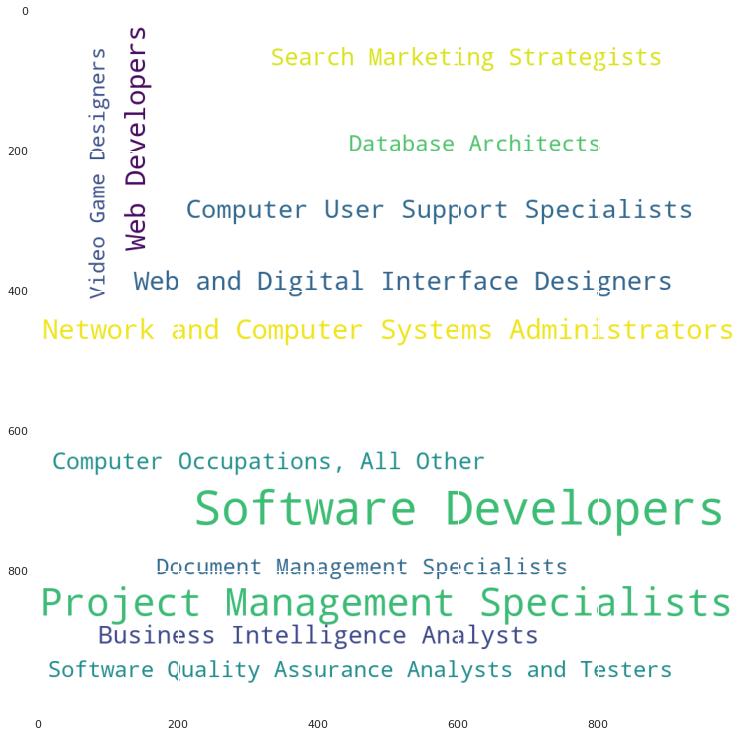

In [137]:
plt.rcParams['figure.figsize']= (12,12)
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(freq)
plt.imshow(wc)
plt.savefig('WordCloud.png',dpi=350)

<h1>Skill</h1>

In [146]:
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer

In [8]:
full_context = ' '.join(df['Job_Responsibility'].astype(str).values)
tokens = TreebankWordTokenizer().tokenize(full_context)

In [9]:
len(tokens)

2984591

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [t for t in tokens if t not in stop_words]

In [11]:
counter = Counter(tokens)

In [12]:
counter.most_common(1000)

[(',', 195553),
 ('&', 28207),
 (')', 17871),
 ('(', 17687),
 (';', 15708),
 ('software', 14002),
 ('development', 13672),
 ('knowledge', 12659),
 ('design', 12005),
 ('team', 10861),
 ('new', 10002),
 ('experience', 9205),
 ('support', 8828),
 ('#', 8759),
 ('work', 8536),
 ('IT', 8404),
 ('technical', 8048),
 ('system', 7962),
 ('data', 7829),
 ('web', 7635),
 ('business', 7499),
 ('Must', 7206),
 ('project', 7156),
 ('Design', 6900),
 ('Experience', 6848),
 ('etc.', 6794),
 ('using', 6720),
 ('Develop', 6700),
 ('network', 6680),
 ('systems', 6601),
 ('application', 6470),
 ('management', 6390),
 ('maintain', 6329),
 ('applications', 6167),
 ('requirements', 6162),
 ('code', 5997),
 (':', 5713),
 ('ensure', 5702),
 ('performance', 5372),
 ('develop', 5144),
 ('Ensure', 5143),
 ('test', 5121),
 ('Work', 5076),
 ('including', 4949),
 ('related', 4833),
 ('understanding', 4734),
 ('based', 4687),
 ('user', 4684),
 ('product', 4673),
 ('Maintain', 4499),
 ('To', 4470),
 ('testing', 4434

In [13]:
import collections
import re
import sys
import time


def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=2, max_length=2):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')


In [14]:
ngrams = count_ngrams(df['Job_Responsibility'].astype(str).values)


In [15]:
print_most_frequent(ngrams,1000)

----- 1000 most common 2-grams -----
of the: 8795
must have: 5795
knowledge of: 5506
experience in: 5396
design and: 4714
with the: 4429
understanding of: 4429
and maintain: 4295
ability to: 4283
to the: 4273
in the: 3989
experience with: 3826
for the: 3737
to ensure: 3689
to work: 3656
knowledge in: 3646
and other: 3635
will be: 3588
knowledge on: 3376
such as: 3283
work with: 3274
responsible for: 3234
able to: 3178
as per: 2678
and implement: 2620
social media: 2514
software development: 2488
develop and: 2450
good knowledge: 2384
must be: 2370
should have: 2258
team members: 2231
by the: 2155
on the: 2131
in a: 2124
development and: 2121
based on: 2087
and develop: 2054
strong knowledge: 2015
asp net: 1987
the company: 1956
best practices: 1869
and software: 1857
and maintenance: 1855
collaborate with: 1848
front end: 1843
of all: 1828
experience on: 1808
a team: 1797
web application: 1779
any other: 1763
software and: 1745
requirements and: 1744
as a: 1730
support to: 1712
systems

In [161]:
skills = pd.read_csv(os.path.join(DATA,'skills.csv'))

In [143]:
skills = skills.fillna(0)
skills.index = skills.Skills
skills['Skills'].tolist()

['PHP',
 'Database',
 'SQL',
 'JavaScript',
 'SEO',
 'Android',
 'CSS',
 'Oracle',
 'HTML',
 'MySQL',
 'C',
 'JAVA',
 'WordPress',
 'Laravel',
 'Linux',
 'jQuery',
 'iOS',
 'Bootstrap',
 'AJAX',
 'OOP',
 'ASP.NET',
 'Angular',
 'SQL Server',
 'QA',
 'Excel',
 'PowerPoint',
 'Word',
 'Photoshop',
 'Illustrator',
 'Python',
 'C#',
 'ERP',
 'HTML5',
 'CSS3',
 'Git',
 'JS',
 'React',
 'AWS',
 'MVC',
 'Windows',
 'API',
 'Marketing']

In [144]:
for year in years:
    skills[str(year)] = 0
    skills[str(year)] = skills[str(year)].astype(int)

In [147]:
for year in tqdm(years):
    temp_df = df[df['Year'] == year]
    for context in (temp_df['Job_Responsibility'] + temp_df['Job_Context']).values:
        tokens = TreebankWordTokenizer().tokenize(str(context).lower())
        for skill in skills['Skills'].tolist():
#             if str(skill).lower() in str(context).lower():
            if str(skill).lower() in tokens:
                skills.loc[skill,str(year)] += 1

100%|██████████| 6/6 [00:10<00:00,  1.81s/it]


In [148]:
for year in tqdm(years):
    temp_df = df[df['Year'] == year]
    for context in (temp_df['Job_Responsibility'] + temp_df['Job_Context']).values:
#             if str(skill).lower() in str(context).lower():
            if str('SQL Server').lower() in str(context).lower():
                skills.loc['SQL Server',str(year)] += 1
            if str('object oriented').lower() in str(context).lower():
                skills.loc['OOP',str(year)] += 1
            if str('search engine').lower() in str(context).lower():
                skills.loc['SEO',str(year)] += 1
            if str('C#').lower() in str(context).lower():
                skills.loc['C#',str(year)] += 1
            if str('OneNote').lower() in str(context).lower():
                skills.loc['OneNote',str(year)] += 1
            if str('One Note').lower() in str(context).lower():
                skills.loc['OneNote',str(year)] += 1

100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


In [149]:
skills.drop(['Skills'],axis=1,inplace=True)
skills.loc['SQL'] -= skills.loc['SQL Server']
skills.loc['HTML'] += skills.loc['HTML5']
skills.loc['CSS'] += skills.loc['CSS3']
skills.loc['JavaScript'] += skills.loc['JS']
skills.drop(['HTML5','CSS3','JS'],inplace=True)

In [150]:
skills

,2016,2017,2018,2019,2020,2021
Skills,,,,,,
PHP,37,284,343,404,399,237
Database,29,273,372,485,417,316
SQL,10,85,115,157,118,87
JavaScript,34,310,425,574,556,345
SEO,22,139,184,285,270,204
Android,12,125,163,215,184,138
CSS,37,296,352,401,441,240
Oracle,11,68,86,132,90,55
HTML,41,345,346,441,466,244


In [151]:
yr_len = []
for year in years:
    temp_df = df[df['Year'] == year]
    yr_len.append(len(temp_df))
yr_len

[5038, 5275, 5323, 5570, 4245, 2865]

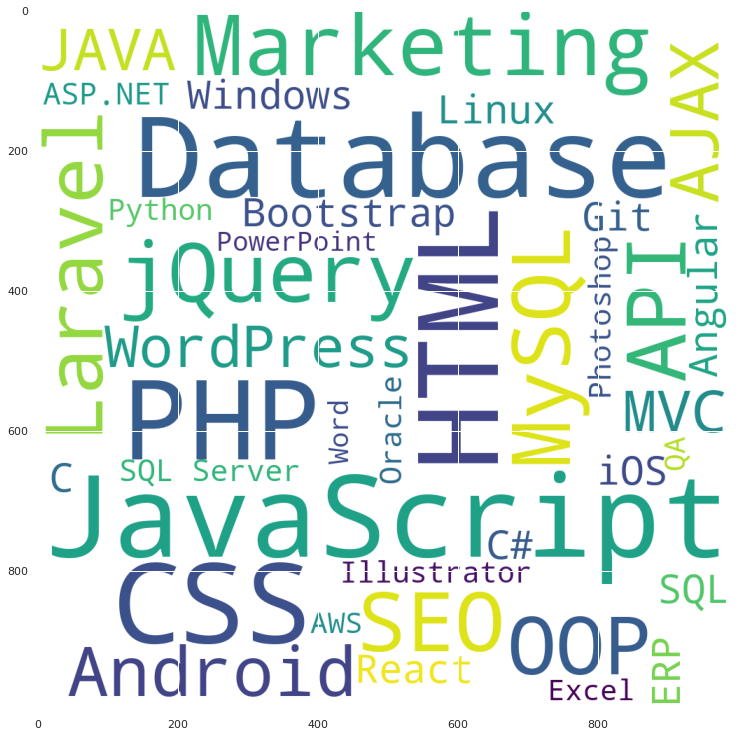

In [152]:

plt.rcParams['figure.figsize']= (12,12)
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(skills.sum(axis=1))
plt.imshow(wc)
plt.savefig('../graph/SkillWordCloud.png',dpi=350)

In [153]:
percentage_df = skills/yr_len

In [154]:
years = list(range(2016,2022))
skill_rank_df = pd.DataFrame(columns =[*years])
for YEAR in years:
    year_df = skills.loc[:,str(YEAR)]
    top_title = year_df.sort_values(ascending=False).index.tolist()
    for rank,title in enumerate(top_title):
        skill_rank_df.loc[title,YEAR] = rank+1

In [155]:
skill_rank_df.to_csv('../result/skill_rank.csv')

In [156]:
skill_final_df = pd.DataFrame(index=skill_rank_df.index, columns = pd.MultiIndex.from_product([years,['Rank','Percentage']]))

In [157]:
for col in skill_rank_df.columns:
    skill_final_df[col,'Rank'] = skill_rank_df[col]
    skill_final_df[col,'Percentage'] = percentage_df[str(col)]    
# for col in percentage_df.columns:


In [158]:
skill_final_df.to_csv('../data/Skill_Rank.csv',float_format='%.2f')

In [159]:
percentage_df.columns

Index(['2016', '2017', '2018', '2019', '2020', '2021'], dtype='object')

In [162]:
skill_corr_df = pd.DataFrame(index = df.index,columns=skills['Skills'].tolist()).fillna(0)

In [163]:
for i , context in enumerate((df['Job_Responsibility'] + df['Job_Context']).values):
    tokens = TreebankWordTokenizer().tokenize(str(context).lower())
    for skill in skills['Skills'].tolist():
        if str(skill).lower() in tokens:
            skill_corr_df.loc[i,skill] += 1

In [164]:
for year in tqdm(years):
    temp_df = df[df['Year'] == year]
    for i,context in enumerate((temp_df['Job_Responsibility'] + temp_df['Job_Context']).values):
#             if str(skill).lower() in str(context).lower():
            if str('SQL Server').lower() in str(context).lower():
                skill_corr_df.loc[i,'SQL Server'] += 1
            if str('object oriented').lower() in str(context).lower():
                 skill_corr_df.loc[i,'OOP'] += 1
            if str('search engine').lower() in str(context).lower():
                 skill_corr_df.loc[i,'SEO'] += 1
            if str('C#').lower() in str(context).lower():
                 skill_corr_df.loc[i,'C#'] += 1

100%|██████████| 6/6 [00:00<00:00, 11.97it/s]


In [165]:

skill_corr_df.loc[:,'SQL'] -= skill_corr_df.loc[:,'SQL Server']
skill_corr_df.loc[:,'HTML'] += skill_corr_df.loc[:,'HTML5']
skill_corr_df.loc[:,'CSS'] += skill_corr_df.loc[:,'CSS3']
skill_corr_df.loc[:,'JavaScript'] += skill_corr_df.loc[:,'JS']
skill_corr_df.drop(['HTML5','CSS3','JS'],inplace=True,axis=1)

In [166]:
skill_corr_df[skill_corr_df < 0] = 0
skill_corr_df[skill_corr_df > 0] = 1

In [128]:
for skill in skills['Skills']:
    try:
        print(skill,skill_corr_df[skill].value_counts())
    except:
        pass

PHP 0    26612
1     1704
Name: PHP, dtype: int64
Database 0    26424
1     1892
Name: Database, dtype: int64
SQL 0    27356
1      960
Name: SQL, dtype: int64
JavaScript 0    26316
1     2000
Name: JavaScript, dtype: int64
SEO 0    27267
1     1049
Name: SEO, dtype: int64
Android 0    27479
1      837
Name: Android, dtype: int64
CSS 0    26714
1     1602
Name: CSS, dtype: int64
Oracle 0    27874
1      442
Name: Oracle, dtype: int64
HTML 0    26651
1     1665
Name: HTML, dtype: int64
MySQL 0    27287
1     1029
Name: MySQL, dtype: int64
C 0    27700
1      616
Name: C, dtype: int64
JAVA 0    27564
1      752
Name: JAVA, dtype: int64
WordPress 0    27537
1      779
Name: WordPress, dtype: int64
Laravel 0    27451
1      865
Name: Laravel, dtype: int64
Linux 0    27777
1      539
Name: Linux, dtype: int64
jQuery 0    27109
1     1207
Name: jQuery, dtype: int64
iOS 0    27770
1      546
Name: iOS, dtype: int64
Bootstrap 0    27597
1      719
Name: Bootstrap, dtype: int64
AJAX 0    27533


In [167]:
corr_df = skill_corr_df.corr()

<ipython-input-168-224e117f4374>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df,dtype=np.bool)


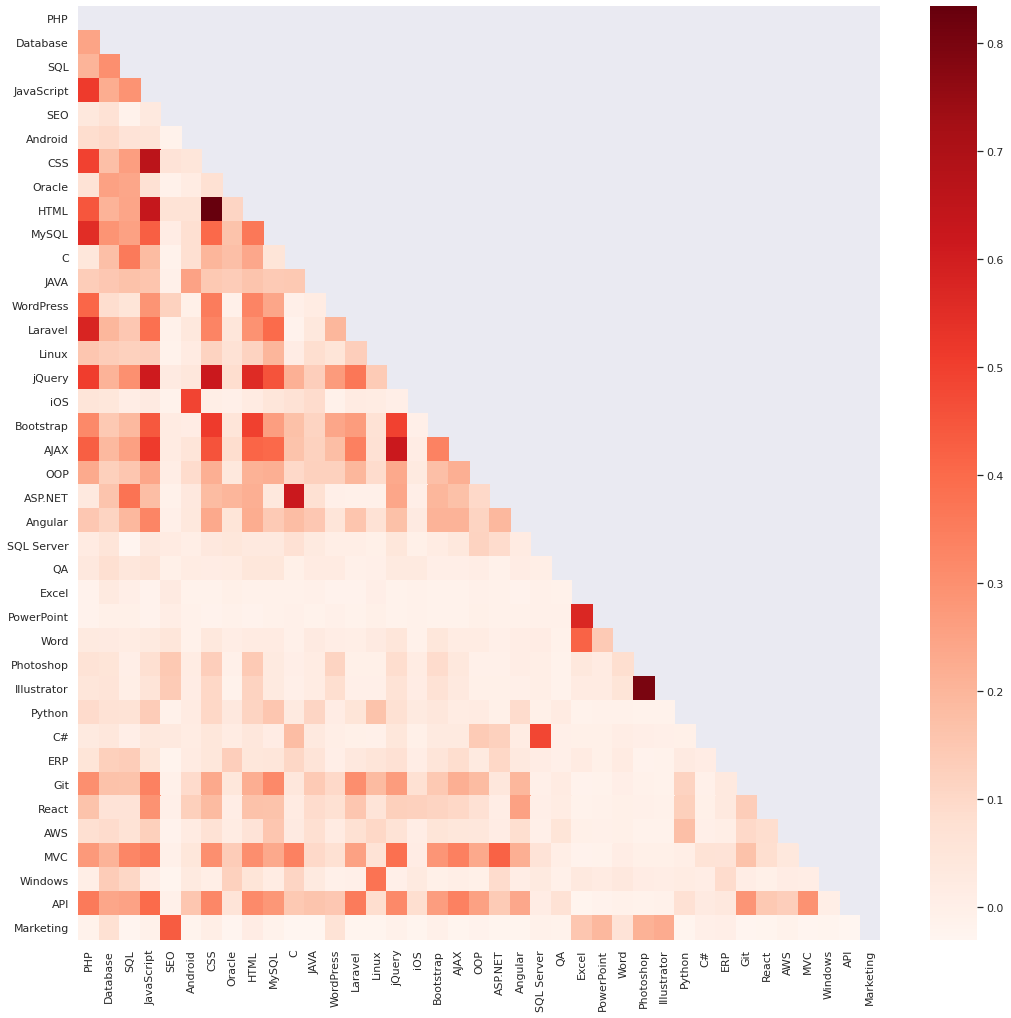

In [168]:
mask = np.zeros_like(corr_df,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['figure.figsize'] = (16,16)
ax = sns.heatmap(corr_df,mask=mask,cmap='Reds')
cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.savefig('../graph/SKill_heatmap.png',dpi=350)

In [169]:
skill_corr_df['Title']  = df['MergedTitle']

In [170]:
job_skill_corr = skill_corr_df.join(pd.get_dummies(skill_corr_df['Title']))

In [189]:
corr_df = job_skill_corr.corr()

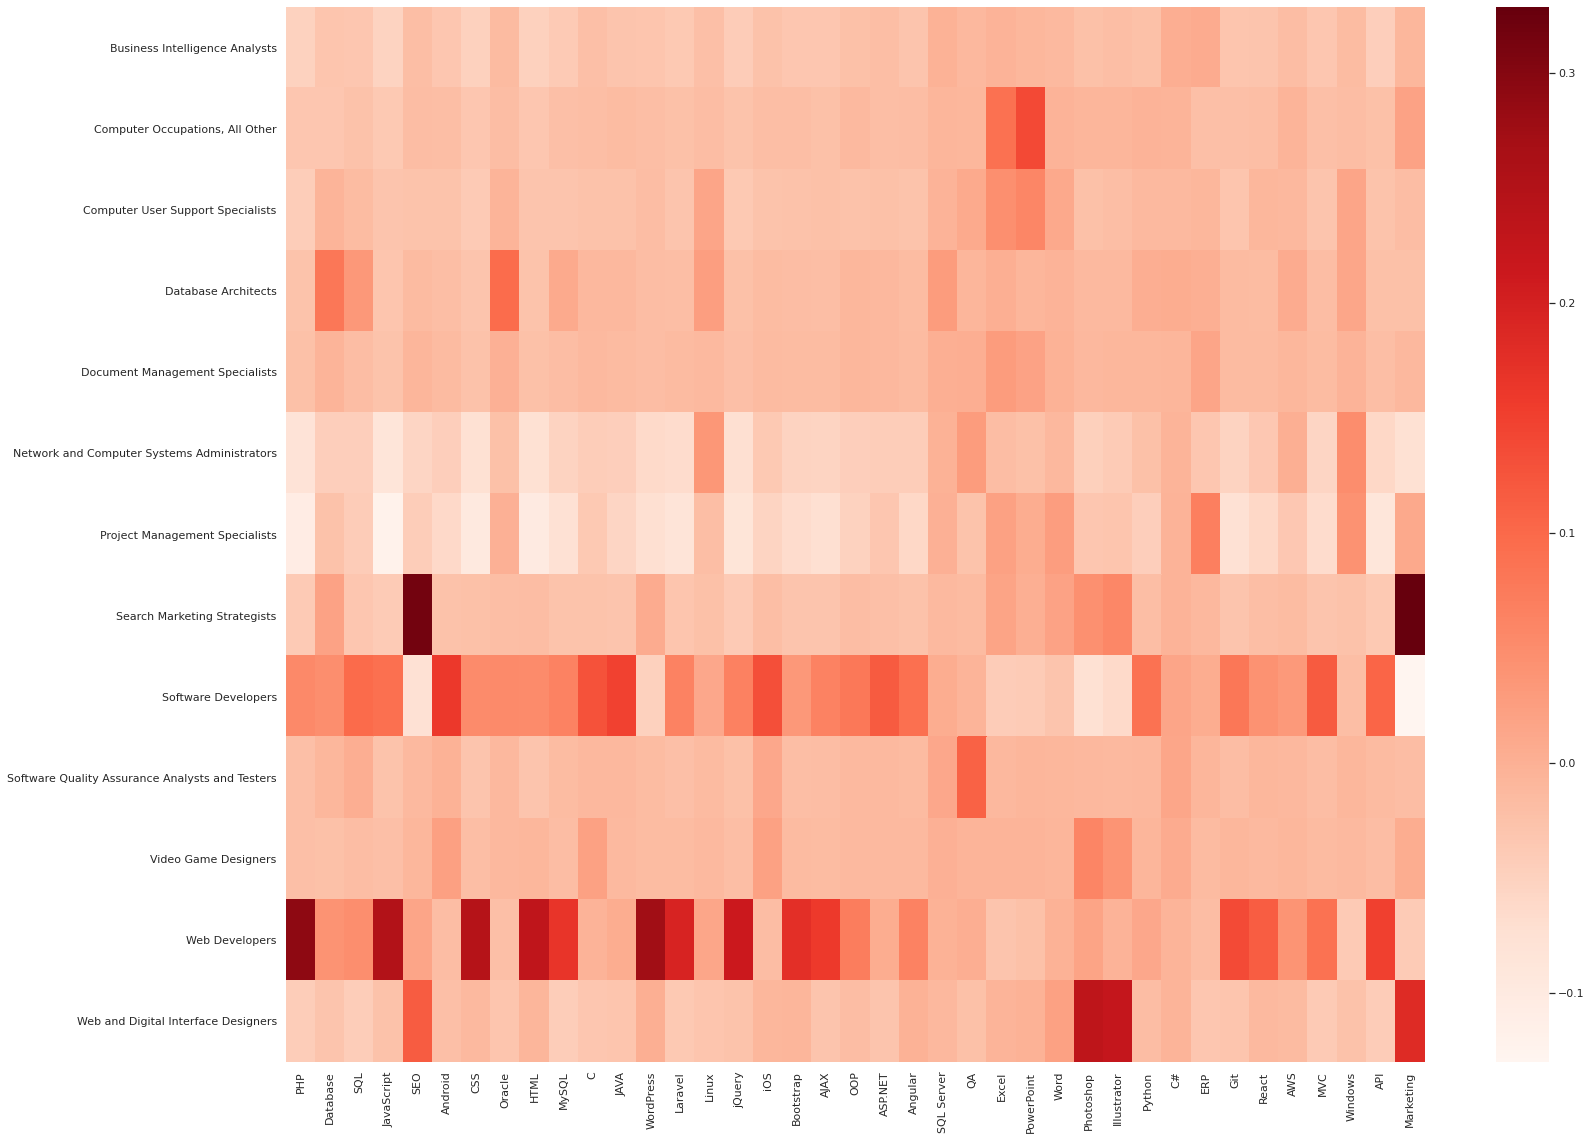

In [197]:
# mask = np.zeros_like(corr_df,dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

plt.rcParams['figure.figsize'] = (24,16)
ax = sns.heatmap(corr_df.T,cmap='Reds')
cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('../graph/Skill_Title_Corr.png',dpi=350)

In [47]:
len(skill_corr_df['Title'].value_counts())

26

In [185]:
skills_list = skills['Skills'].tolist()
skills_list.remove('HTML5')
skills_list.remove('CSS3')
skills_list.remove('JS')
corr_df.drop(skills_list,inplace=True)

In [191]:
corr_df.drop(skill_corr_df['Title'].values,axis=0,inplace=True)

In [194]:
corr_df.drop(skills_list,axis=1,inplace=True)

In [195]:
corr_df

,Business Intelligence Analysts,"Computer Occupations, All Other",Computer User Support Specialists,Database Architects,Document Management Specialists,Network and Computer Systems Administrators,Project Management Specialists,Search Marketing Strategists,Software Developers,Software Quality Assurance Analysts and Testers,Video Game Designers,Web Developers,Web and Digital Interface Designers
PHP,-0.049768,-0.031496,-0.042292,-0.026196,-0.023479,-0.081087,-0.106434,-0.038025,0.055342,-0.022064,-0.021352,0.291911,-0.043017
Database,-0.029928,-0.031865,-0.004462,0.081398,-0.004546,-0.045502,-0.024456,0.019268,0.047509,-0.009503,-0.022752,0.041833,-0.028581
SQL,-0.031841,-0.025812,-0.016742,0.034160,-0.017622,-0.044672,-0.041060,-0.031542,0.098697,0.003220,-0.017026,0.048557,-0.042518
JavaScript,-0.052766,-0.036126,-0.028724,-0.030190,-0.027382,-0.085934,-0.120702,-0.039161,0.091862,-0.027654,-0.021998,0.251008,-0.025671
SEO,-0.020151,-0.017938,-0.027479,-0.014041,-0.007733,-0.055419,-0.042395,0.316835,-0.075396,-0.013383,-0.009530,0.015869,0.115776
Android,-0.031701,-0.019458,-0.027558,-0.019888,-0.014135,-0.044775,-0.061107,-0.025535,0.160918,-0.002535,0.023460,-0.018194,-0.021789
CSS,-0.047937,-0.032310,-0.037111,-0.027906,-0.025511,-0.074140,-0.097234,-0.023786,0.051238,-0.028789,-0.020562,0.247903,-0.012356
Oracle,-0.013911,-0.018274,-0.005849,0.097081,0.000704,-0.023739,0.000835,-0.020295,0.053641,-0.009890,-0.011445,-0.022296,-0.031048
HTML,-0.047589,-0.032047,-0.028012,-0.027149,-0.023125,-0.073529,-0.099787,-0.017919,0.051995,-0.028089,-0.009395,0.231242,-0.006754
MySQL,-0.037277,-0.021541,-0.028516,0.009744,-0.018399,-0.052784,-0.075597,-0.027206,0.064654,-0.016319,-0.017650,0.168052,-0.042280
